# **Fraud Detection Model** 📈

>This notebook builds a machine learning model to detect fraudulent transactions using a cleaned dataset.

## Setup 📂

### 1. Import Libraries

*Import necessary libraries for data manipulation, visualization, preprocessing, model building, evaluation, and handling imbalanced data.*

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc,roc_curve,confusion_matrix

### 2. Load Data

*Load the cleaned dataset 'Fraud_Analysis_Cleaned_Dataset.csv' into a pandas DataFrame.*

In [27]:
df = pd.read_csv('Fraud_Analysis_Cleaned_Dataset.csv')

## Exploratory Data Analysis (EDA) 🔎

### 3. Explore Data - Info

*Display concise summary information about the DataFrame, including the data type of each column and the count of non-null values. This helps identify missing data and understand column types.*

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Step            11142 non-null  int64  
 1   Type            11142 non-null  object 
 2   Amount          11142 non-null  float64
 3   NameOrg         11142 non-null  object 
 4   OldbalanceOrg   11142 non-null  float64
 5   NewbalanceOrg   11142 non-null  float64
 6   NameDest        11142 non-null  object 
 7   OldbalanceDest  11142 non-null  float64
 8   NewbalanceDest  11142 non-null  float64
 9   IsFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


### 4. Explore Data - Head & Tail

*Display the first & last 10 rows of the DataFrame to get a quick visual overview of the data and its structure.*

In [29]:
df.head(10)

,Step,Type,Amount,NameOrg,OldbalanceOrg,NewbalanceOrg,NameDest,OldbalanceDest,NewbalanceDest,IsFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1


In [30]:
df.tail(10)

,Step,Type,Amount,NameOrg,OldbalanceOrg,NewbalanceOrg,NameDest,OldbalanceDest,NewbalanceDest,IsFraud
11132,7,TRANSFER,731485.29,C751320808,0.00,0.00,C801142660,3504660.25,16400000.00,0
11133,7,TRANSFER,2943845.35,C1360289756,0.00,0.00,C1262822392,18000000.00,22600000.00,0
11134,7,TRANSFER,2861134.92,C1326904973,0.00,0.00,C991505714,5352935.74,14000000.00,0
11135,7,TRANSFER,80485.60,C1369223613,0.00,0.00,C465257140,1078685.56,1761413.49,0
11136,7,TRANSFER,19991.02,C1020193304,0.00,0.00,C1915624447,21586.00,17795.02,0
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


### 5. Check Missing Values (Column-wise)

*Calculate and display the number of missing (null or NaN) values for each column in the DataFrame. In this case, there are no missing values.*

In [31]:
df.isnull().sum()

Step              0
Type              0
Amount            0
NameOrg           0
OldbalanceOrg     0
NewbalanceOrg     0
NameDest          0
OldbalanceDest    0
NewbalanceDest    0
IsFraud           0
dtype: int64

### 6. Check Data Shape

*Display the dimensions of the DataFrame, showing the total number of rows (entries) and columns (features).*

In [32]:
df.shape

(11142, 10)

### 7. Descriptive Statistics

*Generate descriptive statistics for the numerical columns in the DataFrame. This includes count, mean, standard deviation, minimum, maximum, and percentile values, rounded to two decimal places.*

In [33]:
round(df.describe(),2)

,Step,Amount,OldbalanceOrg,NewbalanceOrg,OldbalanceDest,NewbalanceDest,IsFraud
count,11142.00,11142.00,11142.00,11142.00,11142.00,11142.00,11142.00
mean,8.72,213191.49,924117.26,824957.65,888354.08,1103211.48,0.10
std,16.07,760065.01,2143004.31,2089894.17,2601375.85,2982447.12,0.30
min,1.00,2.39,0.00,0.00,0.00,0.00,0.00
25%,2.00,4946.62,427.00,0.00,0.00,0.00,0.00
50%,6.00,16761.26,28169.50,4420.60,0.00,0.00,0.00
75%,7.00,154336.58,304085.48,111412.64,271155.47,318637.36,0.00
max,95.00,10000000.00,19900000.00,13000000.00,33000000.00,34600000.00,1.00


### 8. Target Variable Distribution

*Count the occurrences of each unique value in the 'IsFraud' column. This shows the distribution of the target variable (0 for non-fraudulent, 1 for fraudulent) and highlights class imbalance.*

In [34]:
df['IsFraud'].value_counts()

IsFraud
0    10000
1     1142
Name: count, dtype: int64

## Visualizations 📊

### 9. Visualize Transaction Types by Fraud Status

*Create a count plot using seaborn to visualize the number of transactions for each 'Type', differentiated by whether they are fraudulent ('IsFraud' = 1) or not ('IsFraud' = 0).*

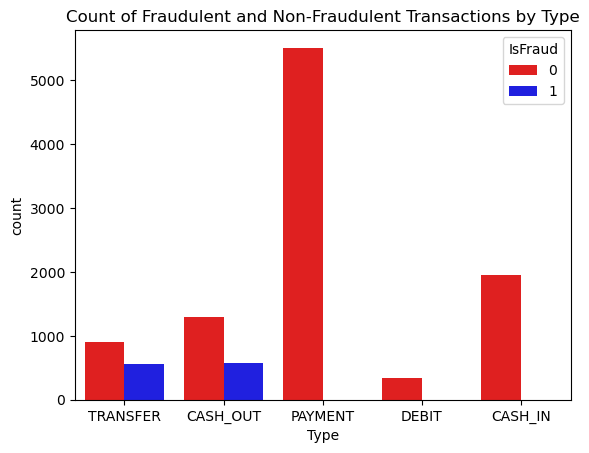

In [35]:
plot = sns.countplot(x='Type', hue='IsFraud', data=df, palette= ['red', 'blue'])
title = plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Type')
plt.show()

### 10. Visualize Fraud Proportion by Transaction Type

*Calculate the mean of 'IsFraud' for each transaction 'Type' (which represents the proportion of fraudulent transactions). Display this proportion as a bar chart to easily compare fraud rates across types.*

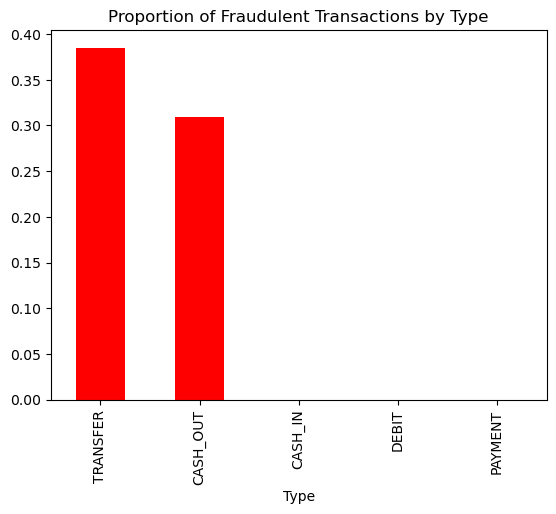

In [36]:
fraud_by_type = df.groupby('Type')['IsFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color = 'red',title = 'Proportion of Fraudulent Transactions by Type')
plt.show()

### 11. Visualize Amount Distribution by Fraud Status

*Create overlapping histograms (with kernel density estimates) using seaborn to compare the distribution of the 'Amount' for fraudulent versus non-fraudulent transactions. A logarithmic scale is used for the amount axis due to the wide range and potential skewness of transaction amounts.*

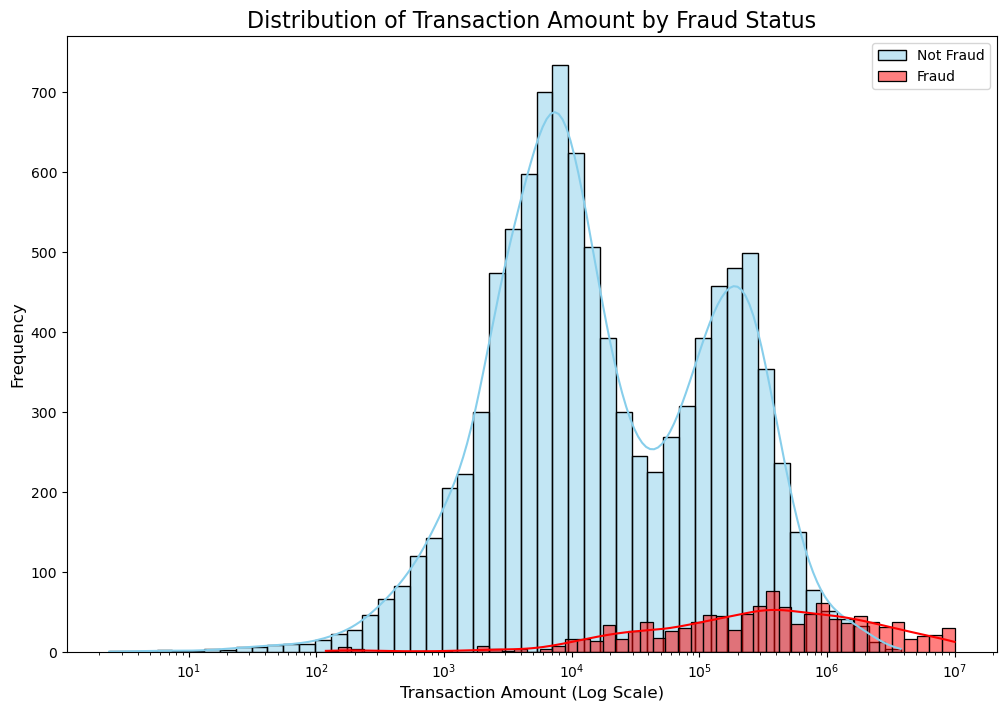

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['IsFraud'] == 0]['Amount'], bins=50, color='skyblue', label='Not Fraud', log_scale=True, kde=True)
sns.histplot(df[df['IsFraud'] == 1]['Amount'], bins=50, color='red', label='Fraud', log_scale=True, kde=True)
plt.title('Distribution of Transaction Amount by Fraud Status', fontsize=16)
plt.xlabel('Transaction Amount (Log Scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

### 12. Visualize Feature Correlations

*Create a heatmap using seaborn to visualize the Pearson correlation coefficient between the selected numerical features ('Step', 'Amount', 'OldbalanceOrg', 'NewbalanceOrg', 'OldbalanceDest', 'NewbalanceDest') and the target variable 'IsFraud'. Annotations show the correlation values.*

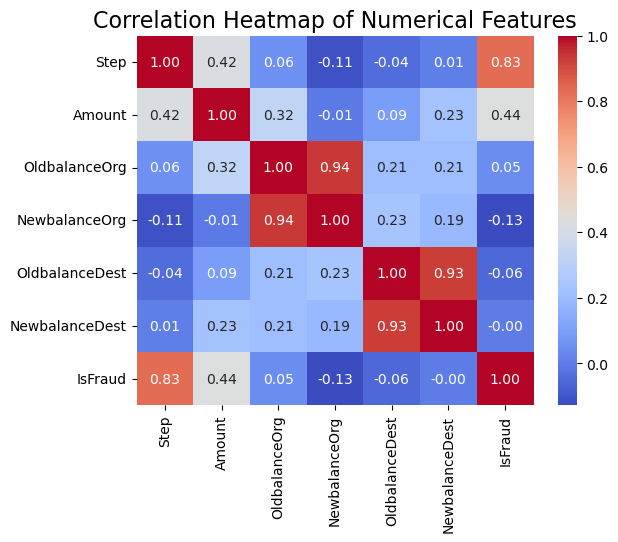

In [38]:
data = df[['Step','Amount', 'OldbalanceOrg', 'NewbalanceOrg', 'OldbalanceDest', 'NewbalanceDest', 'IsFraud']]
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

## Data Processing and Feature Engineering ⚙️

### 13. Configure Pandas Display

*Set a global pandas display option to format floating-point numbers to two decimal places and suppress scientific notation for better readability of numerical outputs.*

In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 14. Feature Selection

*Drop the 'NameOrg' and 'NameDest' columns from the DataFrame. These are likely identifier columns and may not be useful predictive features for the model. The `inplace=True` argument modifies the DataFrame directly. Display the first few rows to confirm removal.*

In [40]:
#Drop irrelevant columns
df.drop(['NameOrg', 'NameDest'], axis=1, inplace=True)
df.head()

,Step,Type,Amount,OldbalanceOrg,NewbalanceOrg,OldbalanceDest,NewbalanceDest,IsFraud
0,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
1,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
2,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
3,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
4,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1


### 15. Define Feature Sets

*Define lists containing the names of the categorical features (`categorical_features`) and numerical features (`numerical_features`) that will be used for preprocessing and model training.*

In [41]:
categorical_features = ['Type']
numerical_features = ['Step', 'Amount', 'OldbalanceOrg', 'NewbalanceOrg', 'OldbalanceDest', 'NewbalanceDest']

### 16. Create Preprocessor

*Define a `ColumnTransformer` object named `preprocessor`. This transformer will apply:*
* *`StandardScaler` to the specified `numerical_features` to standardize their scale.*
* *`OneHotEncoder` to the specified `categorical_features` to convert them into a numerical format suitable for the model.*

In [42]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

### 17. Feature Engineering

*Create new features based on existing ones to potentially improve model performance:*
* *`ErrorBalanceOrg`: Calculates the discrepancy in the origin account balance change.*
* *`ErrorBalanceDest`: Calculates the discrepancy in the destination account balance change.*
* *`Hour_of_Day`: Extracts the hour of the day from the 'Step' feature (assuming 'Step' represents time in hours).*
* *`Day_of_Week`: Extracts the day of the week from the 'Step' feature (assuming 'Step' is hours and cycles weekly).*

In [43]:
df['ErrorBalanceOrg'] = df['OldbalanceOrg'] - df['NewbalanceOrg'] - df['Amount']
df['ErrorBalanceDest'] = df['OldbalanceDest'] - df['NewbalanceOrg'] + df['Amount']
df['Hour_of_Day'] = df['Step'] % 24
df['Day_of_Week'] = (df['Step'] // 24) % 7

### 18. View Engineered Features

*Display the first few rows of the DataFrame again to show the newly created engineered features alongside the existing ones.*

In [44]:
df.head()

,Step,Type,Amount,OldbalanceOrg,NewbalanceOrg,OldbalanceDest,NewbalanceDest,IsFraud,ErrorBalanceOrg,ErrorBalanceDest,Hour_of_Day,Day_of_Week
0,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0.00,181.00,1,0
1,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0.00,21363.00,1,0
2,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1,0.00,2806.00,1,0
3,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1,0.00,29008.00,1,0
4,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1,0.00,20128.00,1,0


## Model Building and Evaluation 🚀

### 19. Prepare Data for Modeling

1.  *Separate the features (independent variables) `X` by dropping the target column 'IsFraud'.*
2.  *Assign the target variable (dependent variable) 'IsFraud' to `y`.*
3.  *Split the data `X` and `y` into training and testing sets using `train_test_split`.*
    * *`test_size=0.2` reserves 20% of the data for testing.*
    * *`random_state=42` ensures reproducibility of the split.*
    * *`stratify=y` ensures that the proportion of fraudulent and non-fraudulent samples is the same in both the training and testing sets, which is important for imbalanced datasets.*

In [45]:
#Train-Test Split
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### 20. Initialize Model

*Initialize a `RandomForestClassifier` model. `random_state=42` is set for reproducibility of the model's internal random processes.*

In [46]:
model = RandomForestClassifier(random_state=42)

### 21. Create and Train Pipeline

*Create a pipeline (`ImbPipeline` from `imblearn` is used, though no specific over/under-sampling step is shown here, it allows easy integration if needed later). The pipeline first applies the `preprocessor` (scaling and encoding) and then trains the `RandomForestClassifier`. The pipeline is fitted using the training data. Then, predictions (`y_pred`) and prediction probabilities (`y_proba`) are generated for the test set.*

In [47]:
# Create the pipeline with the correct model instance
pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)])

# Train on the resampled training data
pipeline.fit(X_train, y_train)

# Test on the *original, imbalanced* test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

### 22. Evaluate Model Performance

*Calculate and print key performance metrics using the actual test labels (`y_test`) and the model's predictions (`y_pred`, `y_proba`):*
* **Classification Report:** *Shows precision, recall, F1-score, and support for both the fraud and non-fraud classes.*
* **AUC-ROC Score:** *Area Under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between classes across different thresholds.*
* **Precision-Recall AUC Score:** *Area Under the Precision-Recall curve, often a more informative metric for imbalanced datasets like fraud detection.*

In [48]:
 # --- Evaluation Metrics ---
print("\nClassification Report (on real-world test data):")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")


Classification Report (on real-world test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.96      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

AUC-ROC Score: 0.9999
Precision-Recall AUC Score: 0.9995


### 23. Visualize ROC Curve

*This code plots the Receiver Operating Characteristic (ROC) curve to visualize the model's ability to distinguish between classes.*
* *It plots the* **True Positive Rate (TPR)** *against the* **False Positive Rate (FPR)**.
* *The* **Area Under the Curve (AUC)** *is shown in the legend (`roc_auc`).*
* *A dashed line represents the performance of a random classifier.*
* *Labels and a title are added for clarity*.

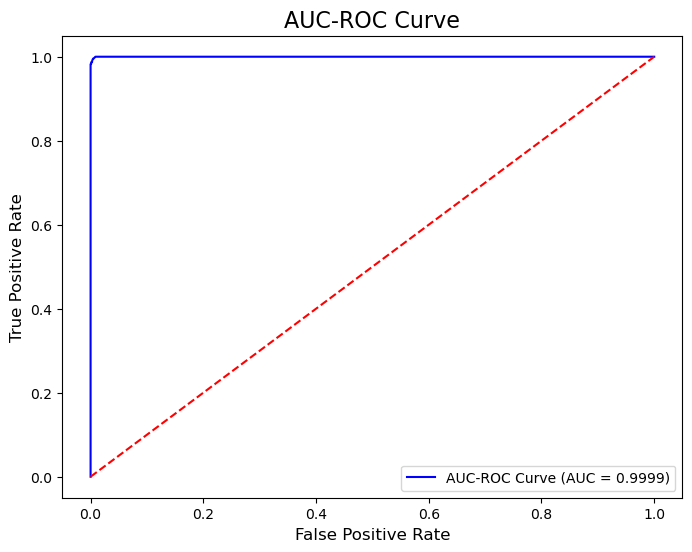

In [49]:
#AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('AUC-ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()


### 24. Visualize Confusion Matrix

*Calculate the confusion matrix based on the test set predictions and visualize it as a heatmap. This shows the counts of true positives, true negatives, false positives, and false negatives.*


Confusion Matrix:


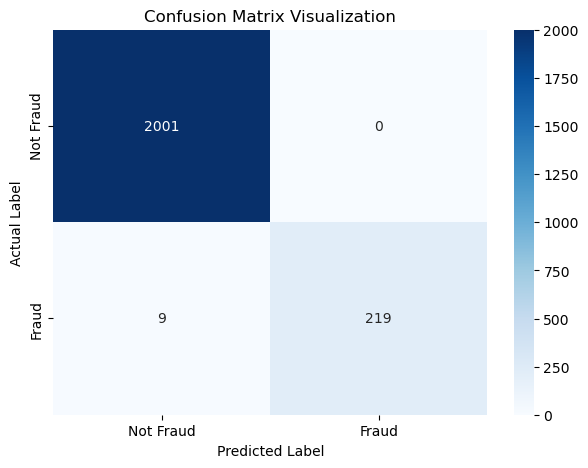

In [25]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Visualization')
plt.show()